DATA 620 - Web Analytics
Week 2 Project 1

#Team Info
Brian Liles
Rajwant Mishra
Md. Jalal Uddin
Sarah Wigodsky

Identify and load a network dataset that has some categorical information available for each node.
For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
Compare your centrality measures across your categorical groups.

A data set of political blogs available from the website http://www-personal.umich.edu/~mejn/netdata/ will be used to explore social networks.  The data set was compiled in 2005 by Lada Adamic and Natalie Glance and shared in Proceedings of the WWW-2005 Workshop on the Weblogging Ecosystem (2005).  The blog posts are from the time of the 2004 presidential election.  The nodes in the data set have attributes to designate bloggers as being liberal (0) or conservative (1).  The data set is stored in a gml file.  The file lists nodes and edges for each blogger.  The source of the blog, website, and political leaning of the blogger is included.  

In [56]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plot
import pandas as pd

In [57]:
#Before loading the data, I addded 'multigraph 1' to the file
#load data
pol_blogs = nx.read_gml('political_blogs/polblogs.gml')

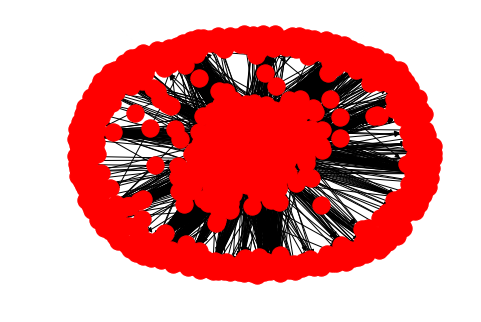

In [3]:
#draw social network
nx.draw(pol_blogs)

In [4]:
#number of nodes
num_nodes = pol_blogs.number_of_nodes()
print ('number of nodes: ' + str(num_nodes))

number of nodes: 1490


In [5]:
#number of edges
num_edges = pol_blogs.number_of_edges()
print ('number of edges: ' + str(num_edges))

number of edges: 19090


In [64]:
# Function to Calcuate Degree of each node

def calcualte_degree(G,n = 0):
    fmdegree = []
    fmNode = []
    for node in G.nodes():
        tempD = G.degree(node)
        if tempD >= n : fmdegree.append(tempD),fmNode.append(node)
            
    return fmdegree,fmNode

gpdDegree , gpdNode = calcualte_degree(pol_blogs,0)

In [63]:
# bloggers with the highest degree centrality
data = {'Node': gpdNode, 
        'Degree': gpdDegree}

df_NodeDegree = pd.DataFrame( data)
df_NodeDegree.head()
df_NodeDegree.sort_values(by=['Degree'],ascending= False).head(10)

,Node,Degree
854,blogsforbush.com,468
154,dailykos.com,384
1050,instapundit.com,363
54,atrios.blogspot.com,351
640,talkingpointsmemo.com,283
728,washingtonmonthly.com,256
962,drudgereport.com,245
1244,powerlineblog.com,236
1152,michellemalkin.com,229
1040,hughhewitt.com,225


In [34]:
#relative degree centrality
deg_centrality = nx.degree_centrality(pol_blogs)
deg_centrality
sorted_x = sorted(deg_centrality.items(), key=lambda kv: kv[1],reverse=True)
sorted_x[0:10]

[('blogsforbush.com', 0.3143049026192075),
 ('dailykos.com', 0.25789120214909333),
 ('instapundit.com', 0.24378777703156482),
 ('atrios.blogspot.com', 0.23572867696440566),
 ('talkingpointsmemo.com', 0.1900604432505037),
 ('washingtonmonthly.com', 0.17192746809939558),
 ('drudgereport.com', 0.16453995970449967),
 ('powerlineblog.com', 0.1584956346541303),
 ('michellemalkin.com', 0.15379449294828745),
 ('hughhewitt.com', 0.1511081262592344)]

The list above shows the 10 bloggers with the highest degree centralities.  Degree centrality measures the number of connections each blogger has.  The values above show the fraction of the nodes each blogger has a connection to.  For example, blogsforbush.com has the most connections, and that blogger is connected to approximately 31% of the other bloggers.  The blogger with the next greatest value of connections is connected to about 26% of the bloggers.  

In [58]:
# create weighted graph from pol_blogs
#the function eigenvector_centrality cannot be run on a Multigraph so we need to convert it into a weighted graph
G = nx.Graph()
for u,v,data in pol_blogs.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if G.has_edge(u,v):
        G[u][v]['weight'] += w
    else:
        G.add_edge(u, v, weight=w)

In [59]:
#eigenvector centrality
eigen_centrality = nx.eigenvector_centrality(G)
sorted_eigen = sorted(eigen_centrality.items(), key=lambda kv: kv[1],reverse=True)
sorted_eigen[0:10]

[('dailykos.com', 0.16421772057004125),
 ('atrios.blogspot.com', 0.16052839158290294),
 ('talkingpointsmemo.com', 0.1492851968324445),
 ('washingtonmonthly.com', 0.13963705001827548),
 ('liberaloasis.com', 0.1189958965845874),
 ('digbysblog.blogspot.com', 0.11787707670355888),
 ('instapundit.com', 0.11336101801066924),
 ('bodyandsoul.typepad.com', 0.11121824140037531),
 ('pandagon.net', 0.10814445623107594),
 ('talkleft.com', 0.10740751022272833)]

Eigenvector centrality measures the significance of a blogger on the network of bloggers.  This takes into account the number of connections each blogger has and whether the connections are to other bloggers who have many connections.  
It can therefore be seen that bloggers with the highest degree centralities do not necessarily also have the highest eigenvector centralities.  The following bloggers are amongst the top 10 most significant bloggers as designated by the eigenvector centrality and have the most connections as shown by degree centrality:  dailykos, instapundit, atrios.blogspot, talkingpointsmemo and washingtonmonthly

In [60]:
##This calculated the centrality for every node - this is the number of nodes each blogger is connected to 
##I plan to delete this - the problem is that the data is in a funny format so I could not just find the top 10 bloggers easily

deg_centrality = nx.degree(pol_blogs)
#def sorted_map(map):
#    ms = sorted(map.iteritems(), key=lambda(k,v): (-v,k))
#    return ms
#ds=sorted_map(pol_blogs)
#ds
#the_list = sorted(deg_centrality.degree_iter(),key=itemgetter(1),reverse=True)
#df_NodeDegree = pd.DataFrame(deg_centrality)
#df_NodeDegree.head()
deg_centrality

DiMultiDegreeView({'100monkeystyping.com': 27, '12thharmonic.com/wordpress': 48, '40ozblog.blogspot.com': 0, '4lina.tblog.com': 0, '750volts.blogspot.com': 4, '95theses.blogspot.com': 1, 'abbadabbaduo.blogspot.com': 1, 'aboutpolitics.blogspot.com': 38, 'achingandspinning.blogspot.com': 8, 'ackackack.com': 15, 'adamtalib.blogspot.com': 1, 'adviceforlefty.blogspot.com': 4, 'agonist.org': 63, 'aintnobaddude.com': 89, 'ajbenjaminjr.blogspot.com': 70, 'alicublog.blogspot.com': 54, 'allanjenkins.typepad.com': 2, 'allspinzone.blogspot.com': 48, 'alphapredator.com/wdtgw.htm': 4, 'alternateworlds.blogspot.com': 13, 'althippo.blogspot.com': 48, 'alvintostig.typepad.com': 26, 'americablog.blogspot.com': 98, 'americablog.org': 81, 'americandreamslost.blogspot.com': 0, 'americanmuslim.blogs.com': 1, 'americanpolitics.com': 35, 'americansforbayh.blogspot.com': 12, 'amleft.blogspot.com': 63, 'amliberal.com/blog': 1, 'amptoons.com/blog': 77, 'anarchyxero.robfindlay.org': 6, 'andifeelfine.blogspot.com'

In [61]:
#this doesn't work and should be removed
list(deg_centrality.values())

AttributeError: 'DiMultiDegreeView' object has no attribute 'values'

Degree centrality measures the number of connections each person has.  

In [9]:

# Function to Calcuate Degree of the Graph

def calcualte_degree(G,n = 0):
    fmdegree = []
    fmNode = []
    for node in G.nodes():
        tempD = G.degree(node)
        if tempD >= n : fmdegree.append(tempD),fmNode.append(node)
            
    return fmdegree,fmNode

gpdDegree , gpdNode = calcualte_degree(pol_blogs,0)

In [53]:
##this is already shown above and can be removed
# Maximum Degree of the Node in the Netwrok
max(gpdDegree)/1490

0.31409395973154364

In [11]:
##this is already shown above and can be removed
# Minimum  Degree of the Node in the Netwrok 
min(gpdDegree)

0